In [ ]:
# 1. Import the required libraries and read the dataset

# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
# read dataset
# read dataset
df = pd.read_csv('TelcomCustomer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# 2.  Check the first few samples, shape, info of the data and try to familiarize yourself with different features
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
#statistical summary of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [25]:
#statistical summary of the categorical data
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [26]:
# 3. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any
# Checking missing values in each colunms
df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [ ]:
- There are no mising values present hence no need to drop 

In [27]:
# 4. Check if there are any duplicate records in the dataset? If any drop them
# checking length of duplicate records
len(df[df.duplicated()])

0

In [ ]:
- There is no duplicated record in dataset

In [28]:
# 5. Drop the columns which you think redundant for the analysis
#Drop the redundant columns - Dependents
df.drop(labels='Dependents', axis=1,inplace=True)

In [29]:
# 6. Encode the categorical variables
df_cat = df.select_dtypes(include='object')

In [30]:
#Label encoding
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

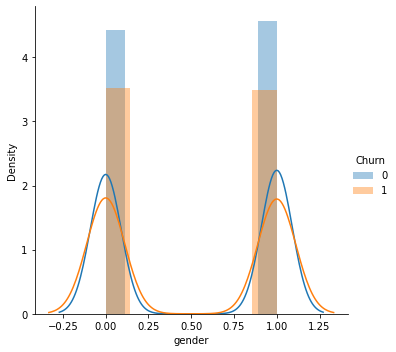

In [33]:
# 7.  Perform a detailed univariate, bivariate, and multivariate analysis with appropriate plots and add detailed comments after each analysis.
## univariate analysis -- Distribution Plot
sns.FacetGrid(df,hue="Churn",size=5).map(sns.distplot,"gender").add_legend()

<AxesSubplot:xlabel='gender', ylabel='Churn'>

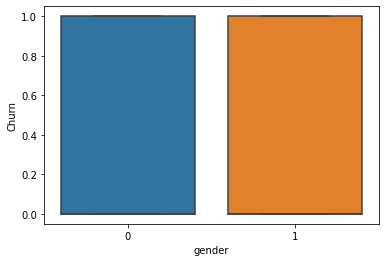

In [38]:
## bivariate analysis - box plot
sns.boxplot(x='gender',y='Churn',data=df)

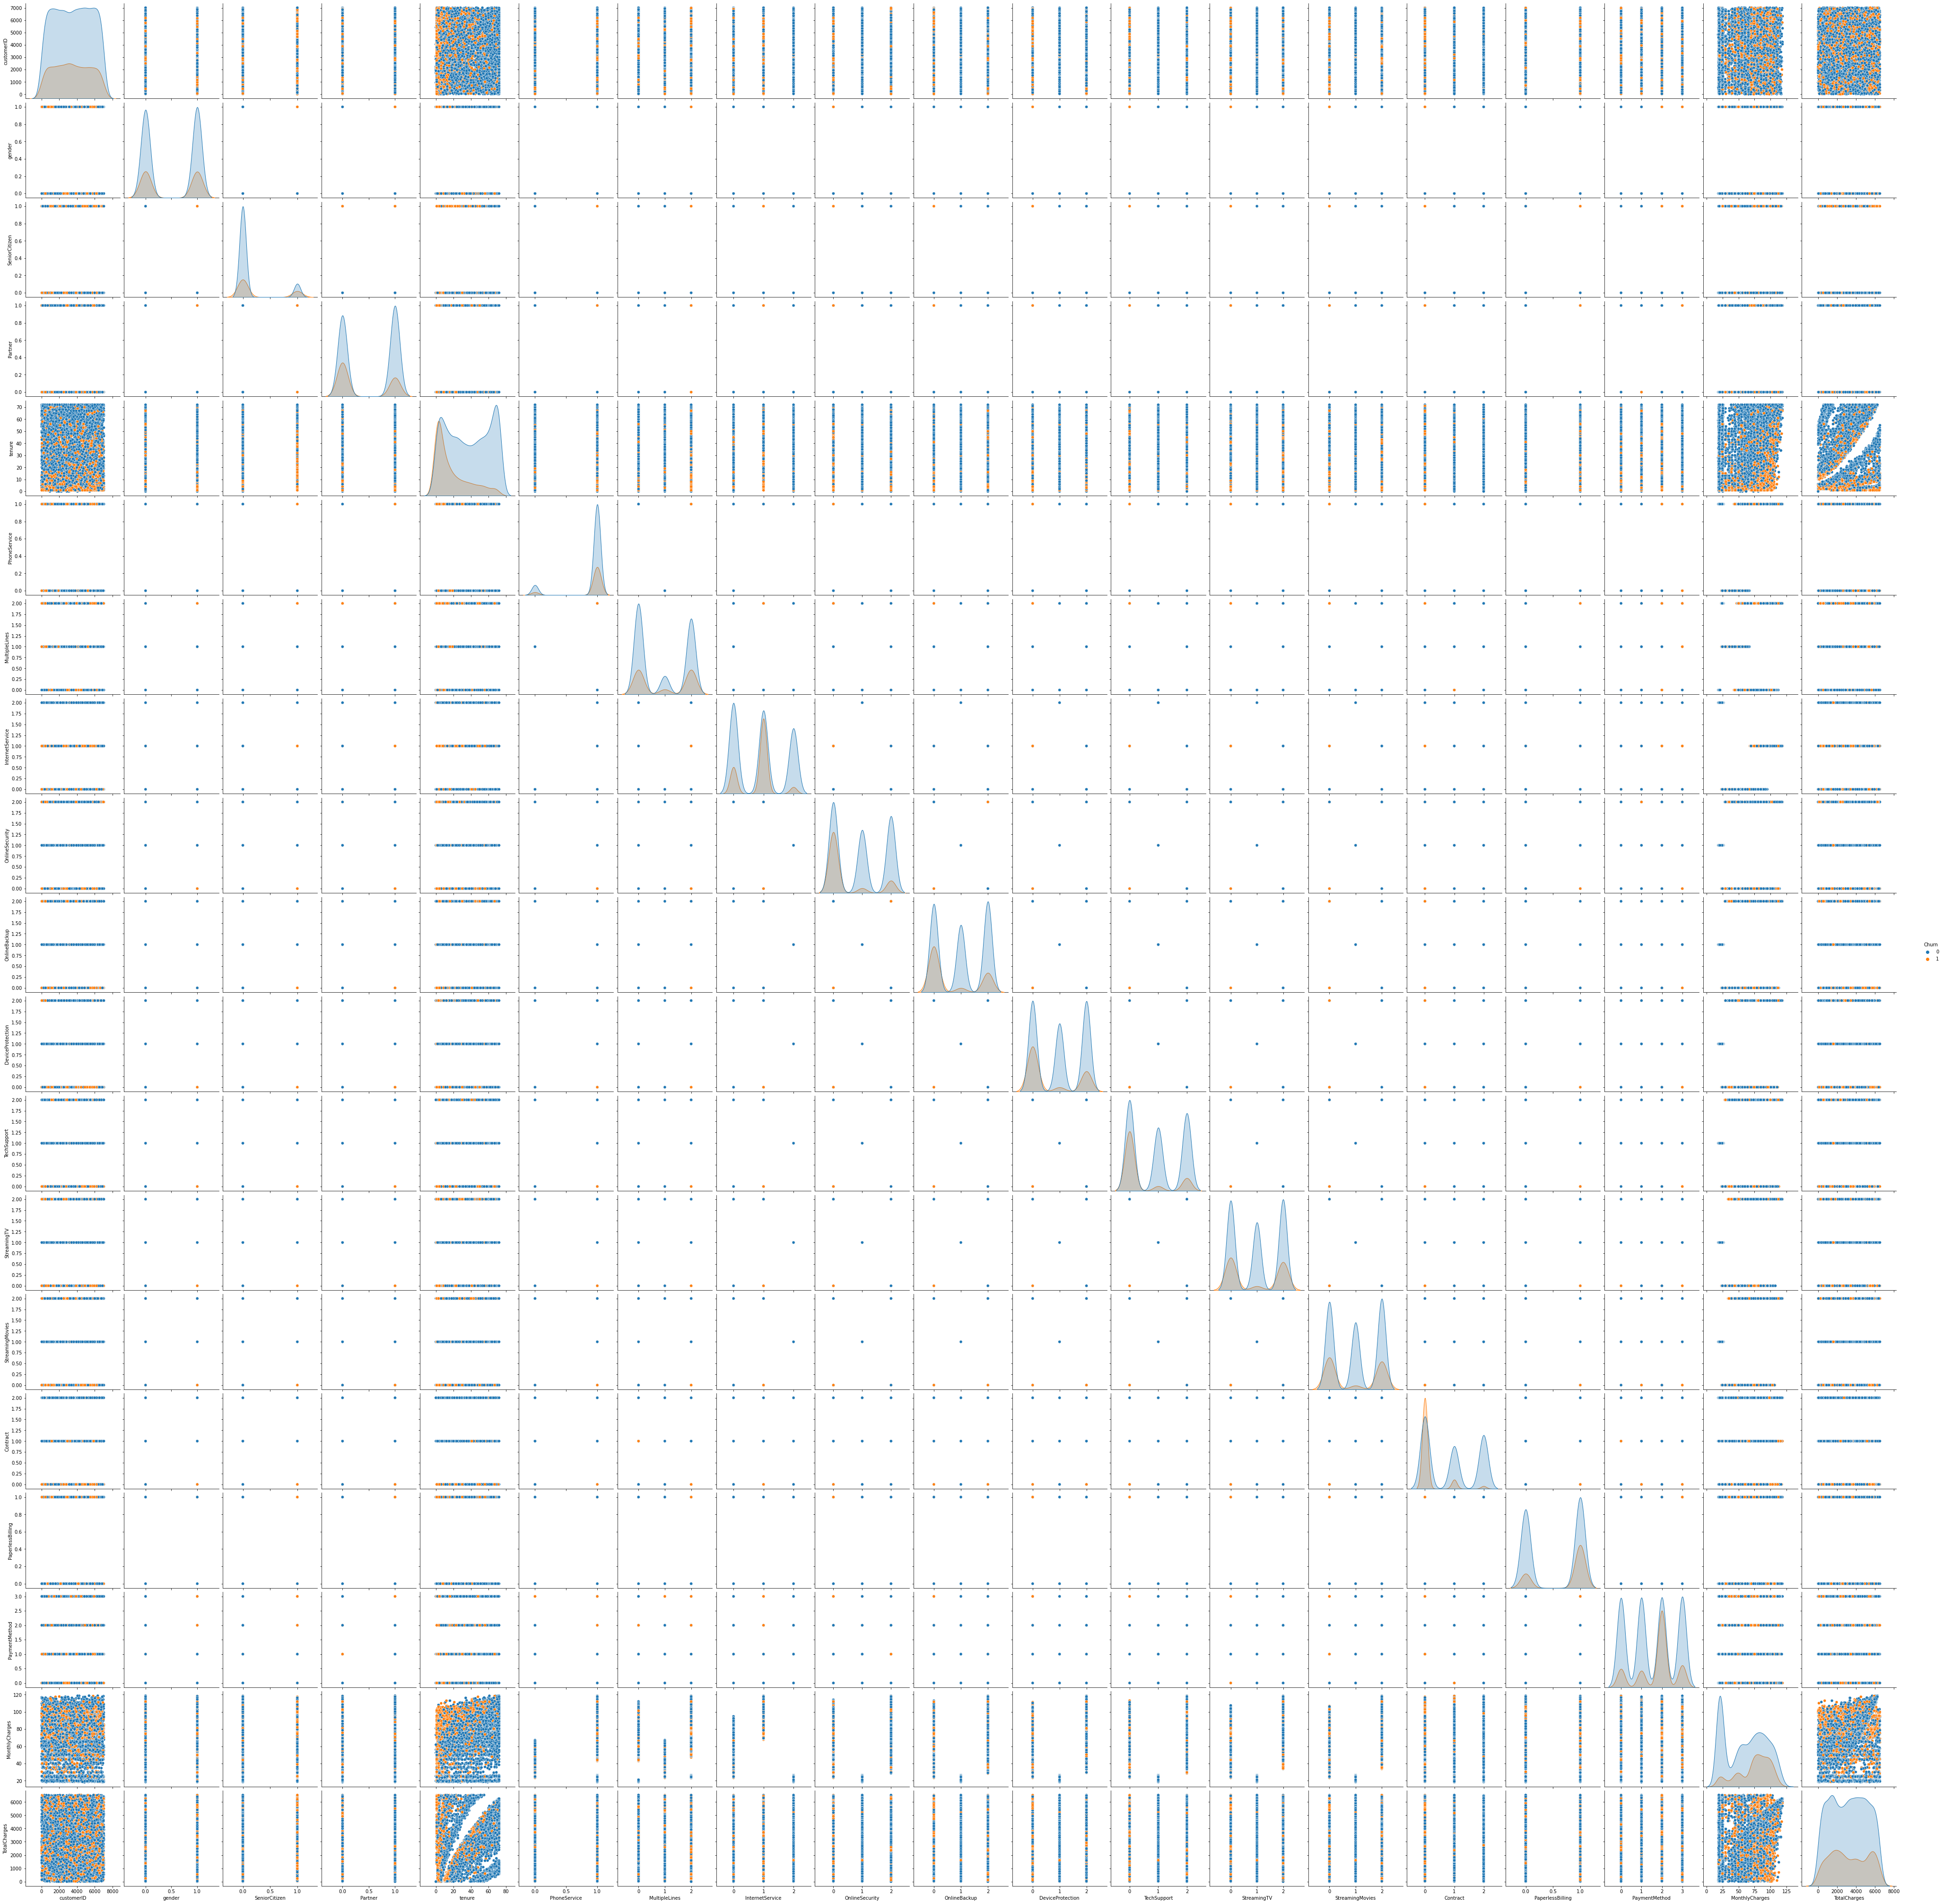

In [36]:
## multivariate analysis -pair plot
sns.pairplot(df,hue='Churn',size=3)
plt.show()

In [39]:
# 8. Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable
X = df.drop('Churn',axis=1)
y = df['Churn']

In [40]:
# 9. Split the dataset into two parts (i.e. 70% train and 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5634, 19) (1409, 19)
(5634,) (1409,)


In [41]:
# 10. Standardize the columns using z-score scaling approach
df_z_scaled = df.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()
    display(df_z_scaled)

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,0,0,1,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,1,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,1,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,1,0,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,0,0,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,0,0,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,1,1,1,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,0,1,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,0,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,0,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,0,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,1,1,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,0,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,2,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,0,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,2,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,0,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,0,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,2,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,0,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,0,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,2,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,0,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,2,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,2,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,2,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,0,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,0,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,0,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,0,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,0,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,2,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,2,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,0,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,0,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,0,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,0,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,0,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,0,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,0,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,2,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,2,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,0,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,0,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,0,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,-1.113416,0,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,-1.113416,0,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,-1.113416,0,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,1.146466,2,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,1.146466,2,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,-1.113416,0,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,0,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,0,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,-1.113416,-1.121326,1,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,0,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,-1.113416,-1.121326,1,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,1.146466,1.138330,1,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,1.146466,1.138330,1,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,0,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,0,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,1,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,-1.113416,-1.121326,0.371245,0,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,1,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,-1.113416,-1.121326,0.371245,0,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,1.146466,1.138330,0.371245,1,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,1.146466,1.138330,0.371245,1,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,1,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,1,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,2,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,-1.113416,-1.121326,0.371245,-1.205028,3,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,3,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,-1.113416,-1.121326,0.371245,-1.205028,0,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,1.146466,1.138330,0.371245,0.829739,3,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,1.146466,1.138330,0.371245,0.829739,1,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,2,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,3,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,29.85,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,-1.113416,-1.121326,0.371245,-1.205028,1.334768,56.95,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,53.85,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,-1.113416,-1.121326,0.371245,-1.205028,-1.473947,42.30,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,1.146466,1.138330,0.371245,0.829739,1.334768,84.80,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,1.146466,1.138330,0.371245,0.829739,-0.537709,103.20,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,29.60,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,74.40,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,-1.160241,2505,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,-1.113416,-1.121326,0.371245,-1.205028,1.334768,-0.259611,1466,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,-0.362635,157,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,-1.113416,-1.121326,0.371245,-1.205028,-1.473947,-0.746482,1400,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,0.197351,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,1.146466,1.138330,0.371245,0.829739,1.334768,0.665945,1597,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,1.146466,1.138330,0.371245,0.829739,-0.537709,1.277443,5698,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,-1.168549,2994,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,0.320315,2660,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,-1.160241,-0.398579,0
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,-1.113416,-1.121326,0.371245,-1.205028,1.334768,-0.259611,-0.948695,0
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,-0.362635,-1.641767,1
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,-1.113416,-1.121326,0.371245,-1.205028,-1.473947,-0.746482,-0.983640,0
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,0.197351,-1.235136,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,1.146466,1.138330,0.371245,0.829739,1.334768,0.665945,-0.879335,0
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,1.146466,1.138330,0.371245,0.829739,-0.537709,1.277443,1.292007,0
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,-1.168549,-0.139670,0
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,0.320315,-0.316512,1


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911826,-1.009487,-0.439885,1.034457,-1.277354,-3.053794,0.062718,-1.183150,-0.918773,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,-1.160241,-0.398579,-0.600981
1,0.216891,0.990462,-0.439885,-0.966554,0.066323,0.327415,-0.991518,-1.183150,1.407221,-1.029846,1.245022,-0.925196,-1.113416,-1.121326,0.371245,-1.205028,1.334768,-0.259611,-0.948695,-0.600981
2,-0.470667,0.990462,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,-1.183150,1.407221,1.242462,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,-0.362635,-1.641767,1.663710
3,0.990516,0.990462,-0.439885,-0.966554,0.514215,-3.053794,0.062718,-1.183150,1.407221,-1.029846,1.245022,1.396200,-1.113416,-1.121326,0.371245,-1.205028,-1.473947,-0.746482,-0.983640,-0.600981
4,1.470528,-1.009487,-0.439885,-0.966554,-1.236636,0.327415,-0.991518,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,0.197351,-1.235136,1.663710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655098,0.990462,-0.439885,1.034457,-0.340852,0.327415,1.116954,-1.183150,1.407221,-1.029846,1.245022,1.396200,1.146466,1.138330,0.371245,0.829739,1.334768,0.665945,-0.879335,-0.600981
7039,-0.981663,-1.009487,-0.439885,1.034457,1.613587,0.327415,1.116954,0.172238,-0.918773,1.242462,1.245022,-0.925196,1.146466,1.138330,0.371245,0.829739,-0.537709,1.277443,1.292007,-0.600981
7040,-0.075740,-1.009487,-0.439885,1.034457,-0.870179,-3.053794,0.062718,-1.183150,1.407221,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,0.398529,-1.168549,-0.139670,-0.600981
7041,1.186751,0.990462,2.272997,1.034457,-1.155201,0.327415,1.116954,0.172238,-0.918773,-1.029846,-1.027837,-0.925196,-1.113416,-1.121326,-0.828148,0.829739,1.334768,0.320315,-0.316512,1.663710


In [45]:
# 11. Write a function.

#i) Which can take the model and data as inputs.
def fit_n_print(model, X_train, X_test, y_train, y_test): 
    model.fit(X_train, y_train)  #ii) Fit the model with the train data.
    pred = model.predict(X_test) #iii) Make predictions on the test set.
    accuracy = accuracy_score(y_test, pred) #iv) Returns the Accuracy Score
    return accuracy  # return all the metrics

In [46]:
# 12. Use the function and train a Logistic regression, KNN, and Naive Bayes Decision tree, Random forest, Boosting and Stacking Classifier models and make predictions on test data.
## Intializing the models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf', rf),('knn', knn), ('gb', gb), ('adb', adb)]
sc = StackingClassifier(estimators=estimators, final_estimator=rf)

In [47]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr, nb, knn, dt, rf, adb, gb, sc], 
                             ['Logistic Regression','Naive Bayes','KNN','Decision tree', 
                              'Random Forest', 'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [48]:
# 13.  Display and compare all the models designed with their test accuracies
result

,Accuracy
Logistic Regression,0.801278
Naive Bayes,0.756565
KNN,0.697658
Decision tree,0.742370
Random Forest,0.811214
Ada Boost,0.814053
Gradient Boost,0.819021
Stacking,0.791341


In [ ]:
# 14. Select the final best trained model along with your detailed comments for selecting this model


In [ ]:
# 15. Concolusions
